In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import re
import scipy.stats as stats
from scipy.stats import gamma

**2D) Given the distribution of daily #cases and daily #deaths in two states, combine the deaths of both the states and plot posterior distributions (Gamma) for week 5, week 6, week 7 and week 8 starting from June 1,2020. MAP values for gamma distribution are the mean values.**

**Duration - June 1, 2020 to July 26, 2020**


In [138]:
covid_combined = pd.DataFrame()
covid_combined["date"] = covid_data_actual["Date"]
covid_combined['date'] = pd.to_datetime(covid_combined['date'])  
covid_combined["cases"] = covid_data_actual["PA confirmed"] + covid_data_actual["RI confirmed"]
covid_combined["deaths"] = covid_data_actual["PA deaths"] + covid_data_actual["RI deaths"]
covid_combined = covid_combined.set_index(['date'])

In [139]:
covid_jun_four = covid_combined.loc['2020-6-1':'2020-6-28']
al = covid_combined.loc['2020-6-29':'2020-7-05']
# print(al['deaths'].mean())
# covid_jun_four.reset_index(drop=False, inplace=True)
lambda_mme = covid_jun_four['deaths'].mean()
# print(lambda_mme)
beta = lambda_mme
week_5 = covid_combined.loc['2020-6-29':'2020-7-05']
# week_5.reset_index(drop=False, inplace=True)
deaths_5 = list(week_5['deaths'])
week_6 = covid_combined.loc['2020-7-06':'2020-7-12']
# week_6.reset_index(drop=False, inplace=True)
deaths_6 = list(week_6['deaths'])
week_7 = covid_combined.loc['2020-7-13':'2020-7-19']
# week_7.reset_index(drop=False, inplace=True)
deaths_7 = list(week_7['deaths'])
week_8 = covid_combined.loc['2020-7-20':'2020-7-26']
# week_8.reset_index(drop=False, inplace=True)
deaths_8 = list(week_8['deaths'])

# print(np.mean(deaths_5), np.mean(deaths_6), np.mean(deaths_7), np.mean(deaths_8))

deaths = [deaths_5,deaths_6,deaths_7,deaths_8]
deaths
# deaths_alt = deaths_5+deaths_6+deaths_7+deaths_8
# print(deaths_alt)

[[27.0, 39.0, 42.0, 27.0, 38.0, 3.0, 4.0],
 [1.0, 42.0, 27.0, 39.0, 34.0, 17.0, 7.0],
 [15.0, 21.0, 28.0, 17.0, 21.0, 15.0, 8.0],
 [0.0, 20.0, 31.0, 16.0, 22.0, 14.0, 3.0]]

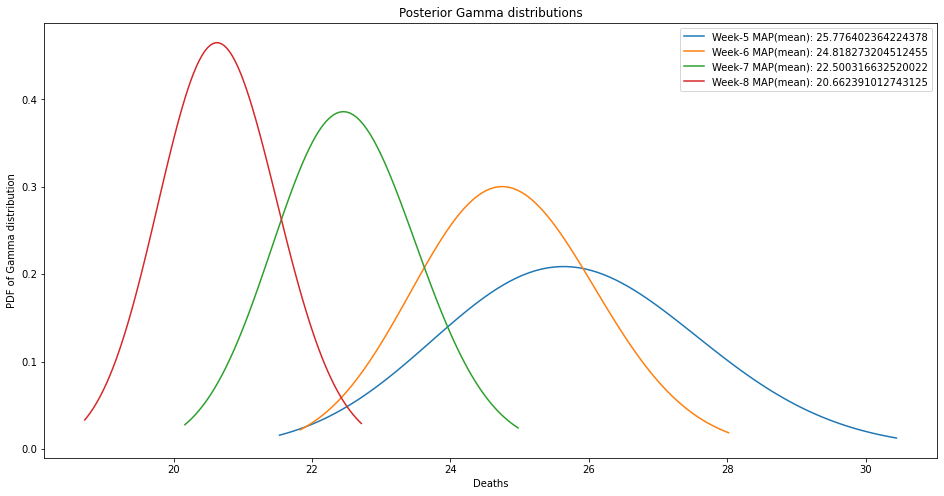

In [140]:
plt.figure(figsize=(16,8))
death_sum = 0
i=0

for d_i in deaths:
    death_sum += sum(d_i)
    alpha = death_sum + 1
    b = (i+1)*7 + (1/beta)
    x = np.linspace(gamma.ppf(0.01, alpha, scale=1/b), gamma.ppf(0.99, alpha, scale=1/b), 100)
    plt.title("Posterior Gamma distributions")
    label= "Week-" + str(i+5) + " MAP(mean): " + str(alpha/b)
    plt.plot(x, gamma.pdf(x, alpha, scale=1/b), label=label)
    plt.xlabel("Deaths")
    plt.ylabel("PDF of Gamma distribution")
    plt.legend()
    i+=1

plt.show()

### Observations:

- From the above graphs, we can say that as the weeks progress, MAP is reducing indicating a decrease in number of deaths
- We can also infer that as the time progresses, the number of deaths might saturate if the trend follows a similar pattern (rate)